In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors         import KNeighborsClassifier
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, plot_roc_curve
import matplotlib.pyplot as plt
from sklearn import tree


#### Data import

In [2]:
df=pd.read_csv("YearPredictionMSD.csv")
df.head()

,year,timbreavg1,timbreavg2,timbreavg3,timbreavg4,timbreavg5,timbreavg6,timbreavg7,timbreavg8,timbreavg9,...,timbrecov69,timbrecov70,timbrecov71,timbrecov72,timbrecov73,timbrecov74,timbrecov75,timbrecov76,timbrecov77,timbrecov78
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [3]:
df.head()
print('a')

a


# Data exploration

### Na

In [1]:
df.isna().sum().sum()

NameError: name 'df' is not defined

 Il n'y a pas de valeur manquante dans le dataset

## Year

### Distribution des year's

Text(0.5, 1.0, "Distribution des year's")

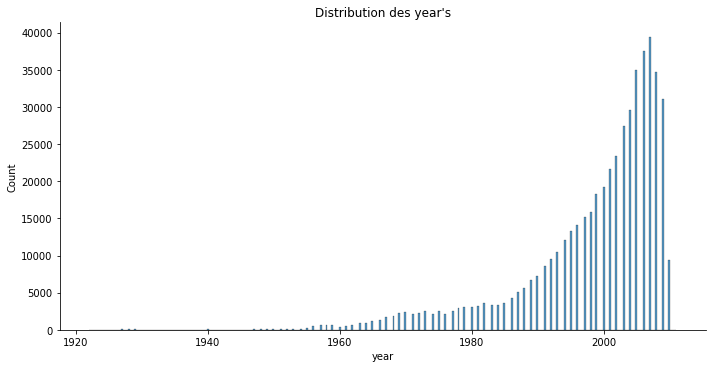

In [194]:
sns.displot(df.year, aspect=2)
plt.title('Distribution des year\'s')

On remarque que le nombre de chanson augmente avec le temps. Nous devons prendre cette information en compte si nous divisons le dataset en intervalle

## AVG

### Distribution des timbreavg's

Text(0.5, 1.0, "Distribution des timbreavg's")

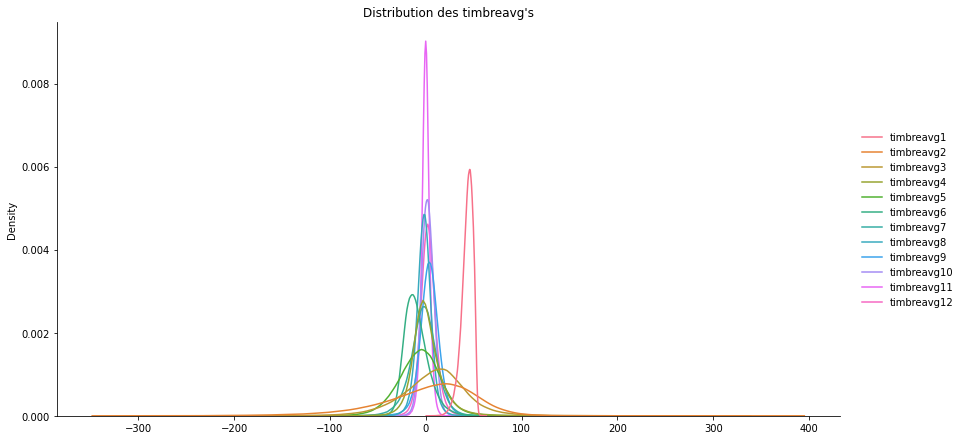

In [195]:
sns.displot(df.iloc[:,1:13],kind="kde",height=6, aspect=2)
plt.title('Distribution des timbreavg\'s')

df.iloc[:,1:13].boxplot(figsize=(20,8))
plt.title('Distribution des timbreavg\'s')

On remarque que les distibutions des avg suivent une loi normale et sont, dans l'ensemble, centrés autour de zéro sauf avg1

### Example de distribution d'un timbreavg au fil des années

Text(0.5, 0.98, '')

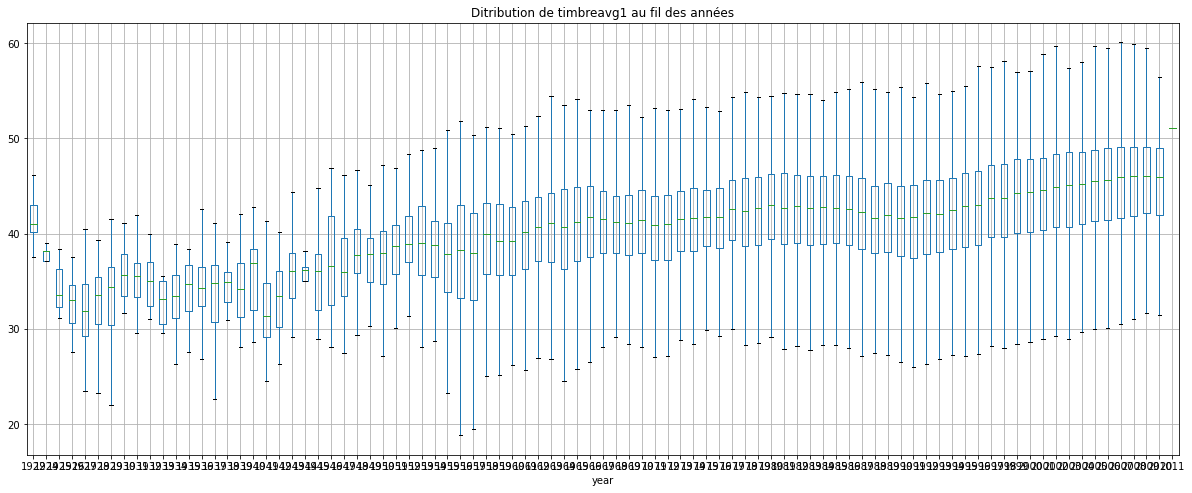

In [196]:
df.boxplot(column=['timbreavg1'], by='year', figsize=(20,8),showfliers=False)
plt.title('Ditribution de timbreavg1 au fil des années')
plt.suptitle('')

On remarque qu'il y a des variations dans la distribution de avg1 au fil des année, ce qui laisse penser qu'il peut y avoir une correlation

## COV

### Distribution des 12 premiers timbrecov's (variance?)

Text(0.5, 1.0, "Distribution des 12 premiers timbrecov's")

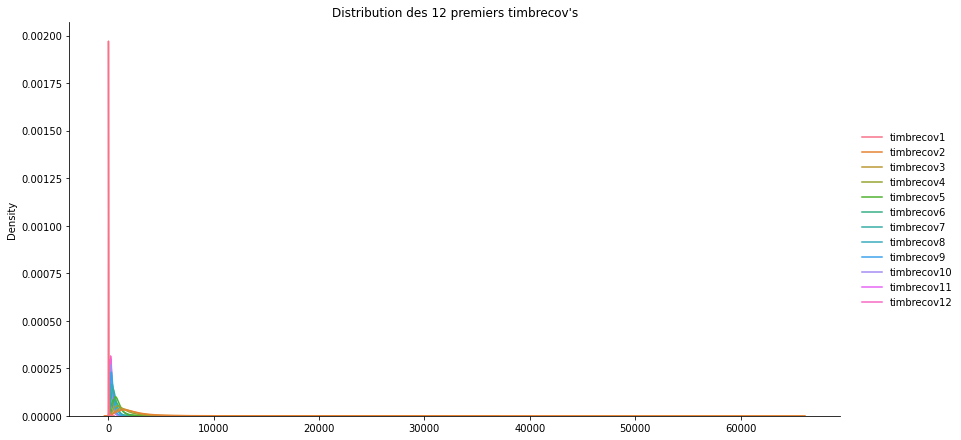

In [197]:
sns.displot(df.iloc[:,13:25],kind="kde",height=6,aspect=2)
plt.title('Distribution des 12 premiers timbrecov\'s')

on remarque que les cov suivent un loi log-normale

### Distribution des 12 premiers log(cov)'s

Text(0.5, 1.0, "Distribution des 12 prmiers log(timbrecov)'s")

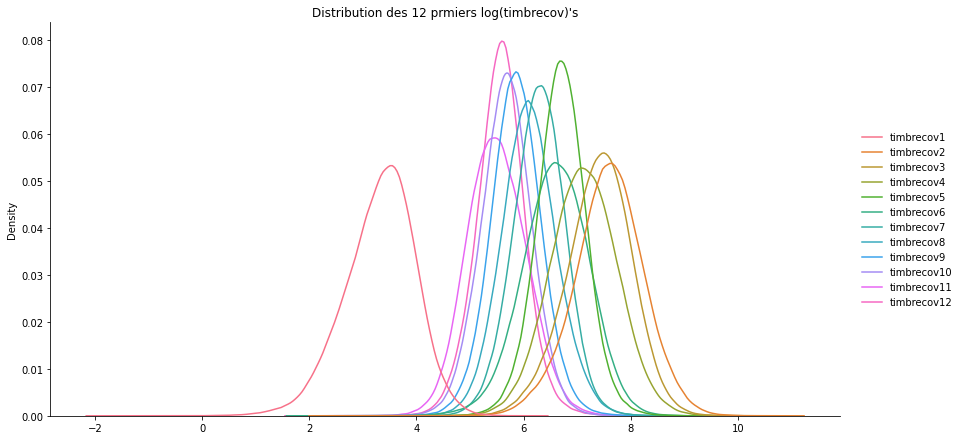

In [198]:
sns.displot(np.log(df.iloc[:,13:25]),kind="kde",height=6,aspect=2)
plt.title('Distribution des 12 prmiers log(timbrecov)\'s')

### Distribution des autres timbrecov's

Text(0.5, 1.0, "Distribution desautres timbrecov's")

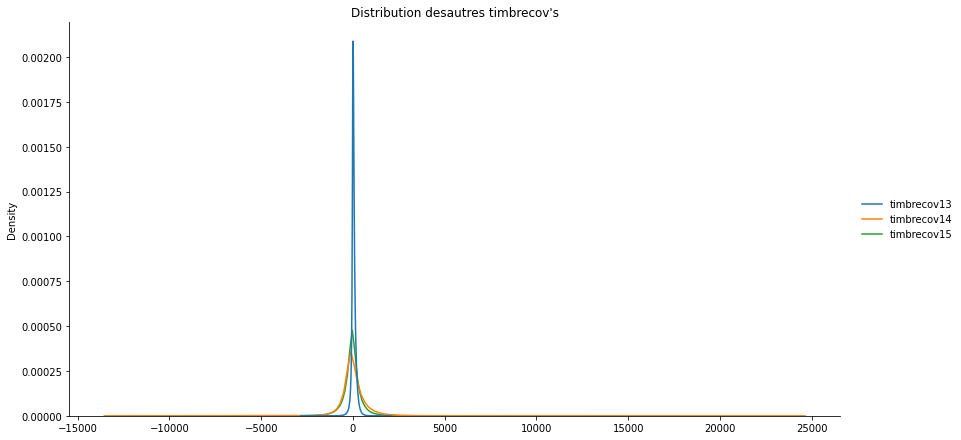

In [199]:
sns.displot(df.iloc[:,25:28],kind="kde",height=6,aspect=2)
plt.title('Distribution desautres timbrecov\'s')

On remarque que les distibutions des cov suivent une loi normale

### Exemple de distribution d'un timbrecov au fil des années


Text(0.5, 0.98, '')

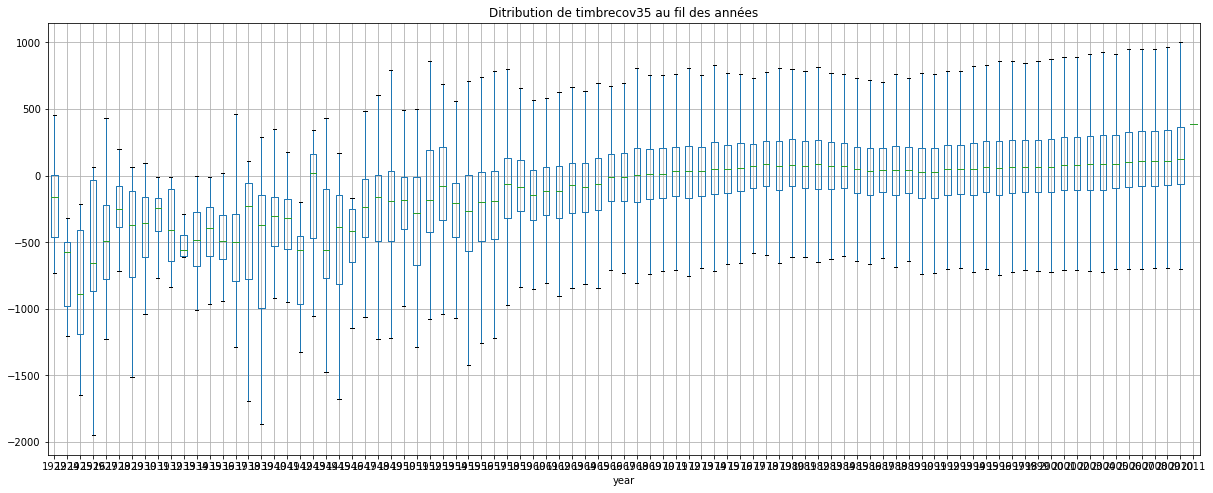

In [200]:
df.boxplot(column=['timbrecov35'], by='year', figsize=(20,8),showfliers=False)
plt.title('Ditribution de timbrecov35 au fil des années')
plt.suptitle('')

On remarque qu'il y a des variations dans la distribution de cov35 au fil des année, ce qui laisse penser qu'il peut y avoir une correlation

# Correlations

### Correlation entre les timbresavg's

Text(0.5, 1.0, "Correlation between timbreavg's")

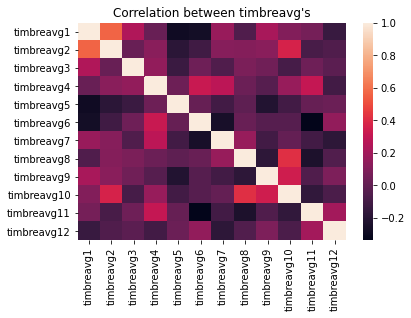

In [201]:
sns.heatmap(df.iloc[:,1:13].corr())
plt.title('Correlation between timbreavg\'s')

On verifie le correlation des features
avg1 et avg2 sont les seules avec une correlation haute

### Correlation a l'année

In [202]:
avg_anova=pd.DataFrame(np.transpose(f_classif(df.iloc[:,1:13],df.year)), index=df.iloc[:,1:13].columns, columns=['F_values','p_values'])
avg_anova.sort_values(by=['F_values','p_values'],ascending=False)

,F_values,p_values
timbreavg1,383.952390,0.000000e+00
timbreavg6,237.508009,0.000000e+00
timbreavg3,141.173344,0.000000e+00
timbreavg7,133.061529,0.000000e+00
timbreavg2,118.344814,0.000000e+00
timbreavg12,73.031418,0.000000e+00
timbreavg10,52.384384,0.000000e+00
timbreavg11,38.958073,0.000000e+00
timbreavg8,31.326287,0.000000e+00
timbreavg5,23.533301,0.000000e+00


On remarque les f-values son très élévé pour avg1 et avg6, ces variables sont très significatives
Toutes les p-values sont assez basses pour rejeter l'hypothèse nulle, on garde donc toutes ces variables

In [203]:
cov_anova=pd.DataFrame(np.transpose(f_classif(df.iloc[:,13:],df.year)), index=df.iloc[:,13:].columns, columns=['F_values','p_values'])
cov_anova.sort_values(by=['p_values'],ascending=False).head(10)

,F_values,p_values
timbrecov77,5.612095,9.465145e-58
timbrecov68,5.676637,9.042609e-59
timbrecov52,6.194570,4.905155e-67
timbrecov43,7.494965,2.577471e-88
timbrecov64,7.868467,1.539019e-94
timbrecov75,8.628110,2.540964e-107
timbrecov30,9.646303,1.129363e-124
timbrecov31,10.093860,2.281647e-132
timbrecov14,10.732460,2.078560e-143
timbrecov63,11.393560,6.611820e-155


Toutes les p-values sont assez basses pour rejeter l'hypothèse nulle, on garde donc toutes ces variables

In [204]:
cov_anova.sort_values(by=['F_values','p_values'],ascending=False).head(10)

,F_values,p_values
timbrecov51,136.561898,0.0
timbrecov34,120.475933,0.0
timbrecov28,104.252577,0.0
timbrecov8,98.419696,0.0
timbrecov55,92.679356,0.0
timbrecov2,84.516520,0.0
timbrecov24,78.936427,0.0
timbrecov61,77.257477,0.0
timbrecov35,76.947409,0.0
timbrecov47,72.299451,0.0


# Modelisation

On applique log aux variances

In [205]:
df.iloc[:,13:25]=np.log(df.iloc[:,13:25])

On divise les données en subset d'année de meme quantité

<AxesSubplot:>

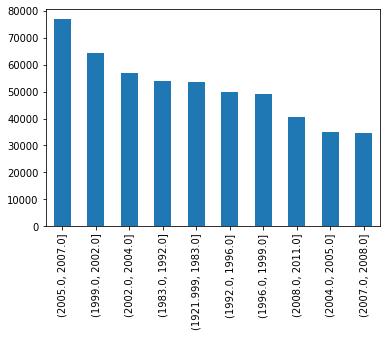

In [206]:
bins=df.quantile(np.linspace(0,1,11))['year']
labels = pd.cut(df.year, bins,include_lowest=True)
df["period"]=labels
labels.value_counts().plot(kind='bar')

In [207]:
df.head()

,year,timbreavg1,timbreavg2,timbreavg3,timbreavg4,timbreavg5,timbreavg6,timbreavg7,timbreavg8,timbreavg9,...,timbrecov70,timbrecov71,timbrecov72,timbrecov73,timbrecov74,timbrecov75,timbrecov76,timbrecov77,timbrecov78,period
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327,"(1999.0, 2002.0]"
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061,"(1999.0, 2002.0]"
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345,"(1999.0, 2002.0]"
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382,"(1999.0, 2002.0]"
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903,"(1999.0, 2002.0]"


### Data split

In [208]:
train = df.iloc[:463715]
test = df.iloc[-51630:]

In [209]:
train_labels = train['period'].cat.codes.astype('category')
train_features = train.drop(["period","year"], axis=1)
test_labels= test['period'].cat.codes.astype('category')
test_features = test.drop(["period","year"], axis=1)
train_features.shape

(463715, 90)

In [210]:
scaler = StandardScaler()
scaler.fit(train_features) 
train_features = scaler.transform(train_features)
test_features  = scaler.transform(test_features)

In [213]:
def print_result(test_labels,rf1_predict):
    print(classification_report(test_labels,rf1_predict))
    plt.matshow(confusion_matrix(test_labels,rf1_predict))
    plt.ylabel   ('True Label')
    plt.xlabel   ('Predicted Label')
    plt.title("Confusion matrix")
    plt.colorbar ()

## Random_forest

In [212]:
def randFor_param(n_estimators_=100,min_samples_leaf_=1,max_depth_=None,max_features_="auto",criterion_="gini"):
    rf=RandomForestClassifier(n_estimators=n_estimators_, min_samples_leaf=min_samples_leaf_, max_depth=max_depth_,
                             criterion=criterion_)
    rf.fit(train_features,train_labels)
    return rf

### n_estimators=100 / min_samples_leaf=1000 / max_depth=None / max_features=auto

In [214]:
rf1=randFor_param(min_samples_leaf_=1000)
joblib.dump(rf1, ".\\models\\rf1.sav")

['.\\models\\rf1.sav']

In [215]:
rf1=joblib.load(".\\models\\rf1.sav")

In [216]:
rf1_predict = rf1.predict(test_features)
rf1_predict

array([0, 7, 7, ..., 7, 7, 7], dtype=int64)

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.27      0.53      0.35      5228
           1       0.33      0.39      0.36      5378
           2       0.32      0.00      0.01      5114
           3       0.00      0.00      0.00      4992
           4       0.16      0.06      0.09      6266
           5       0.00      0.00      0.00      5735
           6       0.00      0.00      0.00      3498
           7       0.19      0.82      0.31      7739
           8       0.00      0.00      0.00      3516
           9       0.00      0.00      0.00      4164

    accuracy                           0.22     51630
   macro avg       0.13      0.18      0.11     51630
weighted avg       0.14      0.22      0.13     51630



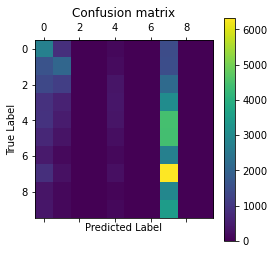

In [217]:
print_result(test_labels,rf1_predict)

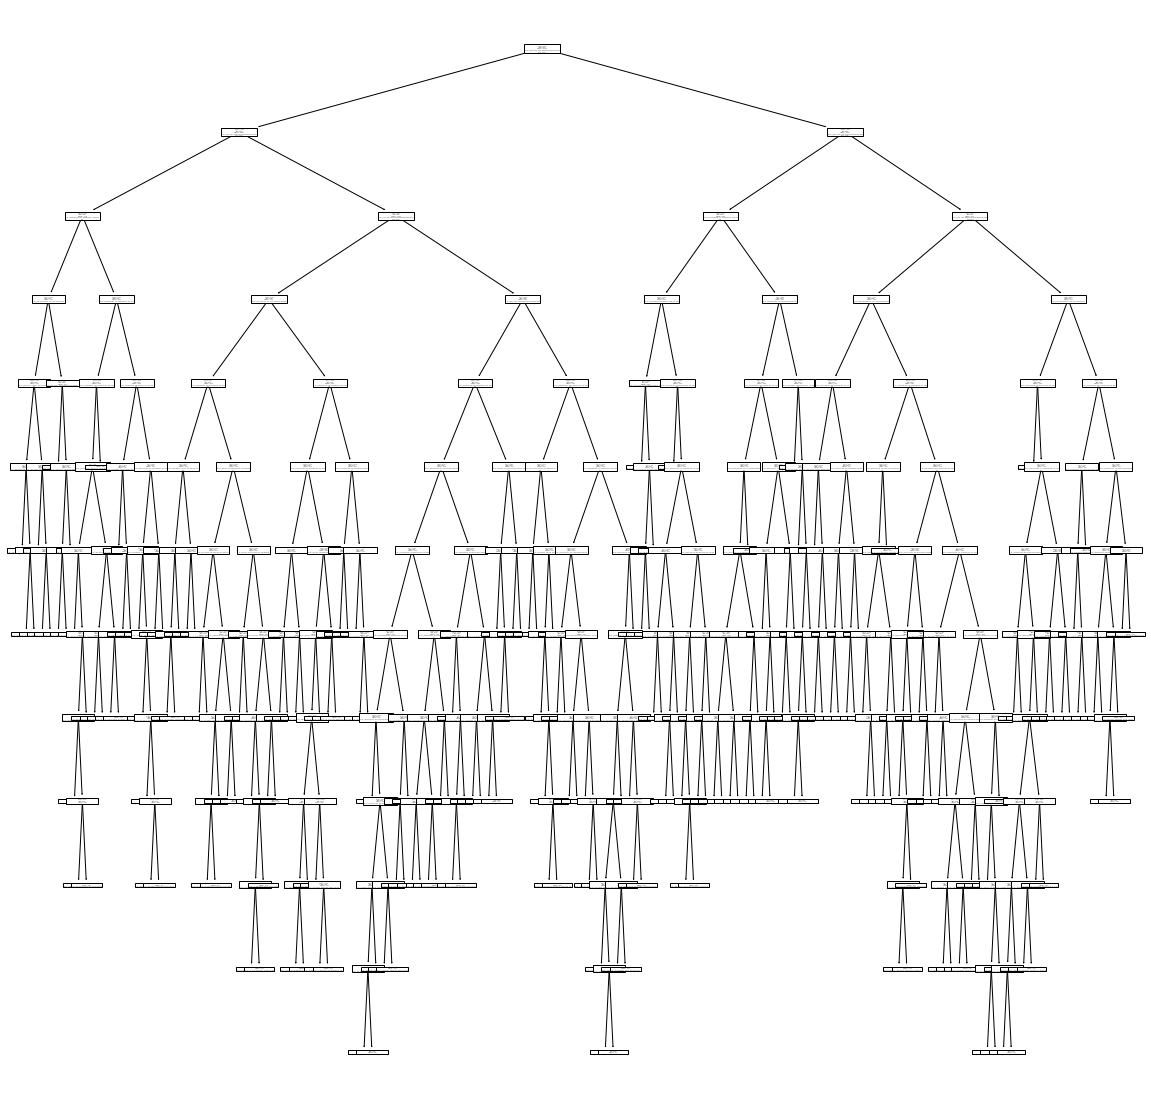

In [218]:
plt.figure(figsize=(20,20))
_=tree.plot_tree(rf1.estimators_[0])

### n_estimators=200 / min_samples_leaf=1 / max_depth=5 / max_features=auto

In [219]:
rf2=randFor_param(n_estimators_=200,max_depth_=5)
joblib.dump(rf2, ".\\models\\rf2.sav")

['.\\models\\rf2.sav']

In [220]:
rf2=joblib.load(".\\models\\rf2.sav")

In [221]:
rf2_predict = rf2.predict(test_features)
rf2_predict

array([0, 7, 7, ..., 7, 7, 7], dtype=int64)

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.26      0.45      0.33      5228
           1       0.36      0.29      0.32      5378
           2       0.00      0.00      0.00      5114
           3       0.00      0.00      0.00      4992
           4       0.19      0.00      0.01      6266
           5       0.00      0.00      0.00      5735
           6       0.00      0.00      0.00      3498
           7       0.18      0.87      0.30      7739
           8       0.00      0.00      0.00      3516
           9       0.00      0.00      0.00      4164

    accuracy                           0.21     51630
   macro avg       0.10      0.16      0.09     51630
weighted avg       0.11      0.21      0.11     51630



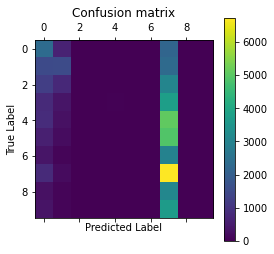

In [222]:
print_result(test_labels,rf2_predict)

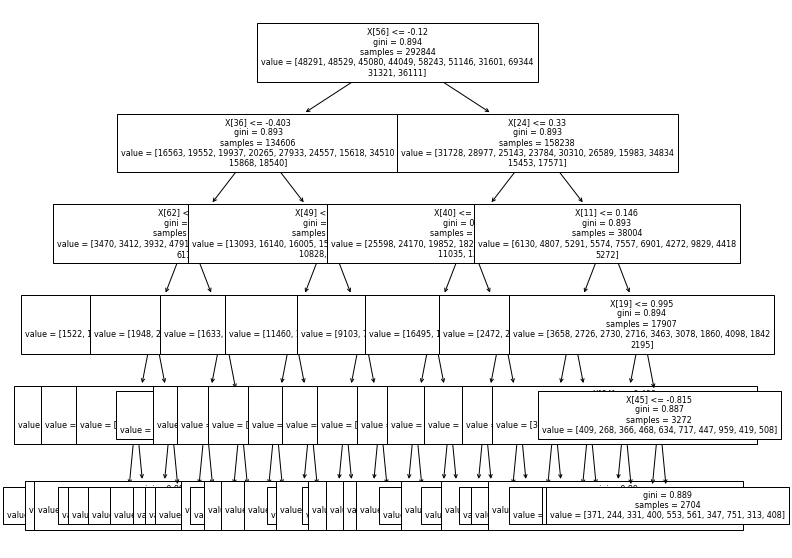

In [223]:
plt.figure(figsize=(10,10))
_=tree.plot_tree(rf2.estimators_[0],fontsize=8)

### n_estimators=200 / min_samples_leaf=50000 / max_depth=auto / max_features=entropy

In [224]:
rf3=randFor_param(min_samples_leaf_=50000, max_features_="entropy")
joblib.dump(rf3, ".\\models\\rf3.sav")

['.\\models\\rf3.sav']

In [225]:
rf3=joblib.load(".\\models\\rf3.sav")

In [5]:
rf3_predict = rf3.predict(test_features)
rf3_predict

array([7, 7, 7, ..., 7, 7, 7], dtype=int64)

              precision    recall  f1-score   support

           0       0.28      0.20      0.23      5228
           1       0.49      0.04      0.08      5378
           2       0.00      0.00      0.00      5114
           3       0.00      0.00      0.00      4992
           4       0.00      0.00      0.00      6266
           5       0.00      0.00      0.00      5735
           6       0.00      0.00      0.00      3498
           7       0.16      0.97      0.27      7739
           8       0.00      0.00      0.00      3516
           9       0.00      0.00      0.00      4164

    accuracy                           0.17     51630
   macro avg       0.09      0.12      0.06     51630
weighted avg       0.10      0.17      0.07     51630



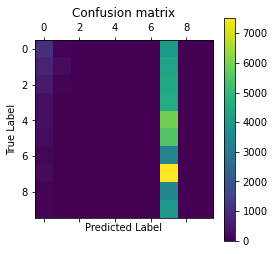

In [229]:
print_result(test_labels,rf3_predict)

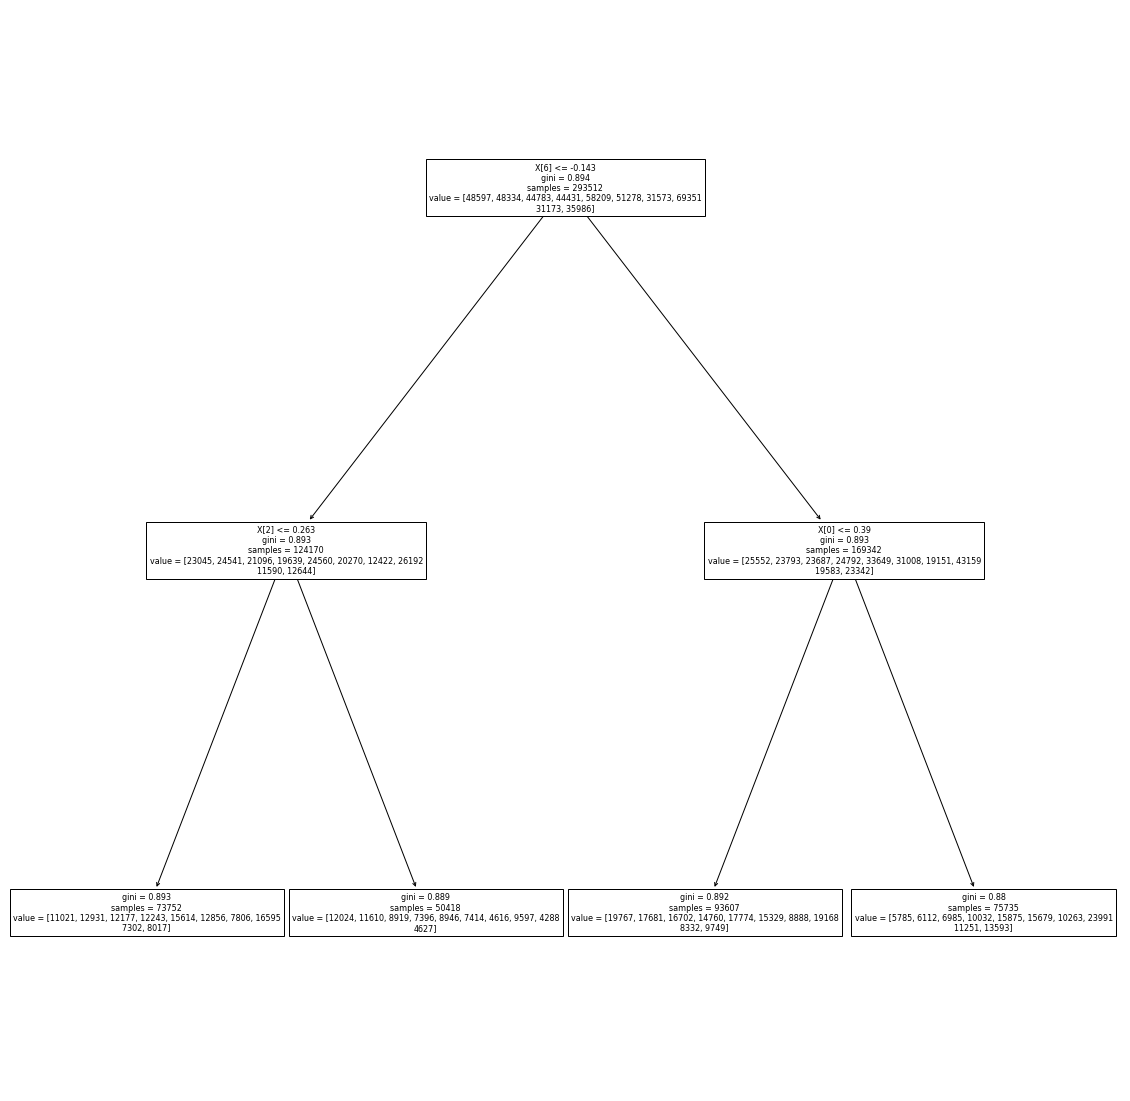

In [228]:
plt.figure(figsize=(20,20))
_=tree.plot_tree(rf3.estimators_[0])

In [5]:
def RandomForest_grid_search():
    parameters = {  "n_estimators"       : [ 10, 100, 200 ], 
              "min_samples_leaf"     : [ 1,  5000,   50000 ],
              "criterion"            : ["gini", "entropy"]         ,
              "max_features"         : ["auto", "log2"],
              "max_depth"            : [None,10]         }
    grid         = GridSearchCV(estimator = RandomForestClassifier(), param_grid= parameters,
                                verbose = 4, scoring='f1_weighted',cv = 2, n_jobs=-1)
    grid.fit(train_features, train_labels)
    
    print (" best_score_ %s with =  %s "%( grid.best_score_,  grid.best_estimator_ ) );  
    return grid.best_estimator_

In [6]:
best_rf=RandomForest_grid_search()
joblib.dump(best_rf, ".\\models\\best_rf.sav")

Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 75.7min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 195.3min finished


 best_score_ 0.1893394163675247 with =  RandomForestClassifier() 


In [11]:
best_rf=joblib.load(".\\models\\best_rf.sav")

['.\\models\\best_rf.sav']

In [13]:
best_rf_predict = best_rf.predict(test_features)
best_rf_predict

array([0, 7, 7, ..., 6, 3, 5], dtype=int64)

              precision    recall  f1-score   support

           0       0.29      0.50      0.37      5228
           1       0.34      0.41      0.37      5378
           2       0.20      0.13      0.16      5114
           3       0.15      0.07      0.09      4992
           4       0.17      0.20      0.18      6266
           5       0.16      0.11      0.13      5735
           6       0.08      0.00      0.01      3498
           7       0.22      0.52      0.31      7739
           8       0.16      0.01      0.02      3516
           9       0.21      0.04      0.07      4164

    accuracy                           0.23     51630
   macro avg       0.20      0.20      0.17     51630
weighted avg       0.20      0.23      0.19     51630



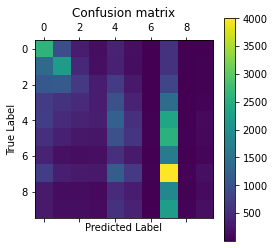

In [14]:
print_result(test_labels,best_rf_predict)

In [ ]:
plt.figure(figsize=(20,20))
_=tree.plot_tree(best_rf.estimators_[0])

## KNN

In [5]:
parameters = {  "n_neighbors"    : [2, 3, 5, 8 , 10]                         , 
                "weights"         : ['uniform', 'distance']                  ,
                "algorithm"      : ['auto', 'ball_tree', 'kd_tree', 'brute'] 
             }

In [6]:
def knn_param(n_neighbors_=5,weights_='uniform',algorithm_='auto'):
    knn=KNeighborsClassifier(n_neighbors=n_neighbors_, weights=weights_, algorithm=algorithm_)
    knn.fit(train_features,train_labels)
    return knn

### n_neighbors=5 / weights='uniform' / algorithm='auto'

In [7]:
knn1=knn_param()
joblib.dump(knn1, ".\\models\\knn1.sav")

In [8]:
knn1=joblib.load(".\\models\\knn1.sav")

['.\\models\\knn1.sav']

In [3]:
knn1_predict = knn1.predict(test_features)
knn1_predict

array([2, 4, 1, ..., 2, 1, 2], dtype=int64)

              precision    recall  f1-score   support

           0       0.23      0.44      0.30      5228
           1       0.22      0.35      0.27      5378
           2       0.14      0.15      0.15      5114
           3       0.12      0.11      0.11      4992
           4       0.15      0.14      0.15      6266
           5       0.14      0.11      0.12      5735
           6       0.08      0.04      0.06      3498
           7       0.21      0.18      0.19      7739
           8       0.10      0.05      0.07      3516
           9       0.14      0.07      0.09      4164

    accuracy                           0.18     51630
   macro avg       0.15      0.16      0.15     51630
weighted avg       0.16      0.18      0.16     51630



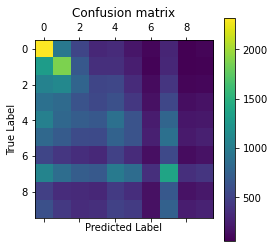

In [4]:
print_result(test_labels,knn1_predict)

### n_neighbors=2 / weights='uniform' / algorithm='ball_tree'

In [9]:
knn2=knn_param(n_neighbors_=2, algorithm_='ball_tree')
joblib.dump(knn2, ".\\models\\knn2.sav")

In [10]:
knn2=joblib.load(".\\models\\knn2.sav")

['.\\models\\knn2.sav']

In [5]:
knn2_predict = knn2.predict(test_features)
knn2_predict

array([2, 0, 1, ..., 2, 1, 2], dtype=int64)

              precision    recall  f1-score   support

           0       0.22      0.40      0.28      5228
           1       0.21      0.34      0.26      5378
           2       0.13      0.18      0.15      5114
           3       0.11      0.14      0.12      4992
           4       0.14      0.16      0.15      6266
           5       0.14      0.12      0.13      5735
           6       0.09      0.07      0.08      3498
           7       0.20      0.11      0.14      7739
           8       0.13      0.04      0.06      3516
           9       0.16      0.02      0.03      4164

    accuracy                           0.16     51630
   macro avg       0.15      0.16      0.14     51630
weighted avg       0.16      0.16      0.15     51630



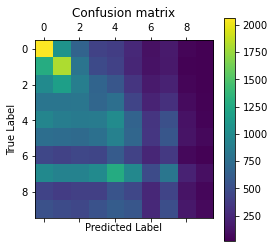

In [6]:
print_result(test_labels,knn2_predict)

### n_neighbors=8 / weights='distance' / algorithm='auto'

In [12]:
knn3=knn_param(n_neighbors_=8, weights_='distance', algorithm_='auto')
joblib.dump(knn3, ".\\models\\knn3.sav")

In [13]:
knn3=joblib.load(".\\models\\knn3.sav")

['.\\models\\knn3.sav']

In [5]:
knn3_predict = knn3.predict(test_features)
knn3_predict

array([2, 0, 7, ..., 9, 1, 5], dtype=int64)

              precision    recall  f1-score   support

           0       0.28      0.35      0.31      5228
           1       0.28      0.33      0.30      5378
           2       0.15      0.14      0.14      5114
           3       0.13      0.11      0.12      4992
           4       0.15      0.16      0.16      6266
           5       0.14      0.13      0.13      5735
           6       0.09      0.06      0.07      3498
           7       0.21      0.25      0.23      7739
           8       0.10      0.07      0.08      3516
           9       0.14      0.10      0.12      4164

    accuracy                           0.18     51630
   macro avg       0.17      0.17      0.17     51630
weighted avg       0.17      0.18      0.18     51630



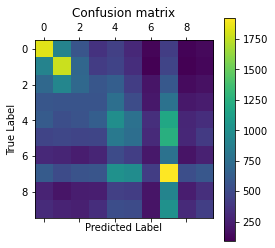

In [6]:
print_result(test_labels, knn3_predict)

In [8]:
def knn_grid_search():
    parameters = {
        "n_neighbors"    : [2, 3, 5, 8 , 10], 
        "weights"        : ['uniform', 'distance'],
        "algorithm"      : ['auto', 'ball_tree', 'kd_tree', 'brute'] 
    }
    grid         = GridSearchCV(estimator = KNeighborsClassifier(), param_grid= parameters,
                                verbose = 4, scoring='f1_weighted',cv = 2, n_jobs=-1)
    grid.fit(train_features, train_labels)
    
    print (" best_score_ %s with =  %s "%( grid.best_score_,  grid.best_estimator_ ) );  
    return grid.best_estimator_

In [ ]:
best_knn=knn_grid_search()
joblib.dump(best_knn, ".\\models\\best_knn.sav")

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
best_knn_predict = best_knn.predict(test_features)
best_knn_predict

In [ ]:
print_results(test_label,best_knn_predict)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors         import KNeighborsClassifier
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, plot_roc_curve
import matplotlib.pyplot as plt
from sklearn import tree
df=pd.read_csv("YearPredictionMSD.csv")
df.iloc[:,13:25]=np.log(df.iloc[:,13:25])
bins=df.quantile(np.linspace(0,1,11))['year']
labels = pd.cut(df.year, bins,include_lowest=True)
df["period"]=labels
train = df.iloc[:463715]
test = df.iloc[-51630:]
train_labels = train['period'].cat.codes.astype('category')
train_features = train.drop(["period","year"], axis=1)
test_labels= test['period'].cat.codes.astype('category')
test_features = test.drop(["period","year"], axis=1)
scaler = StandardScaler()
scaler.fit(train_features) 
train_features = scaler.transform(train_features)
test_features  = scaler.transform(test_features)
def print_result(test_labels,rf1_predict):
    print(classification_report(test_labels,rf1_predict))
    plt.matshow(confusion_matrix(test_labels,rf1_predict))
    plt.ylabel   ('True Label')
    plt.xlabel   ('Predicted Label')
    plt.title("Confusion matrix")
    plt.colorbar ()
rf1=joblib.load(".\\models\\rf1.sav")
rf2=joblib.load(".\\models\\rf2.sav")
rf3=joblib.load(".\\models\\rf3.sav")
best_rf=joblib.load(".\\models\\best_rf.sav")
knn1=joblib.load(".\\models\\knn1.sav")
knn2=joblib.load(".\\models\\knn2.sav")
knn3=joblib.load(".\\models\\knn3.sav")


cross_val_score(rf, test_features, test_labels)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 0.5]
max_features.append(None)
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(10, 100, num = 5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(10, 100, num = 5)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)